# Assignment done by: Felix Aufreiter (1251759)

<img src="https://communications.univie.ac.at/fileadmin/_processed_/csm_Uni_Logo_2016_2f47aacf37.jpg" 
     alt="Logo Universität Wien" 
     width="200"/>

# Practical Machine Learning for Natural Language Processing - 2023 SS  

### Assigment 2 - Generators and Classes   

In this assigment we are going to play with generators and instances/classes - structures that retain state.  

***

### 1. Alea Iacta Est  

(a) Using [generator functions](https://github.com/rsouza/Python_Course/blob/master/Notebooks/Python_Basic/03_Functions.ipynb), create an object that emulates an eight-sided dice (1-8) that is biased, such that the probability of this generator function returning a certain value is proportional to the value itself (i.e. the face "6" is 3 times more likely to come out than face "2");  

 <img src="https://cdn11.bigcommerce.com/s-70184/images/stencil/608x608/products/532/7428/d8-dice-blue__64321.1664335674.jpg" alt="8-Dice" style="width:250px;height:300px;"> 

(b) Using [Matplotlib](https://matplotlib.org/) plt.plot or plt.hist commands, show graphically the result of 10000 casts of the die;  

(c) Modify this generator function so that it terminates automatically when all possible values (1,2,3,4,5,6,7,8) have been cast at least once. In this case, it will return the total absolute time that has elapsed since the first iteration.  (hint: a function can have both **return** and **yield** commands)  

In [37]:
import random
import matplotlib.pyplot as plt
import time

Additional information: https://pynative.com/python-weighted-random-choices-with-probability/

In [32]:
# a)

def dice8():
    sides = [1, 2, 3, 4, 5, 6, 7, 8]
    weights = [1, 2, 3, 4, 5, 6, 7, 8]
    return random.choices(sides, weights=weights, k=1)[0]

#adjust number of rolls
rolls = 2

for i in range(rolls):
    result = dice8()
    print(f"Roll {i+1}, result = {result}") 

Roll 1, result = 4
Roll 2, result = 7


In [33]:
# b)

#store value of 10000 rolls

rolls_10000 = {}
for i in range(10000):
    result = dice8()
    if result in rolls_10000:
        rolls_10000[result] += 1
    else:
        rolls_10000[result] = 1

print(rolls_10000)

{3: 821, 6: 1622, 7: 1962, 8: 2226, 2: 527, 4: 1140, 5: 1392, 1: 310}


In [34]:
#create dataframe with results of 10000 rolls

rolls_list = [[side, count] for side, count in rolls_10000.items()]

df = {'side': [], 'count': []}
for roll in rolls_list:
    df['side'].append(roll[0])
    df['count'].append(roll[1])

print(df)


{'side': [3, 6, 7, 8, 2, 4, 5, 1], 'count': [821, 1622, 1962, 2226, 527, 1140, 1392, 310]}


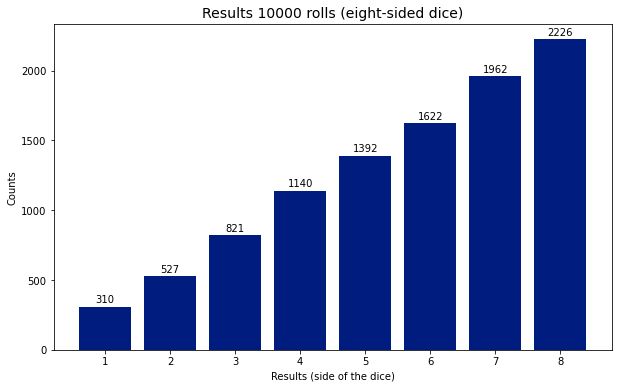

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
#plt.style.use("seaborn-dark-palette")

counts = df['count']
bar_labels = df['side']

ax.bar(bar_labels, counts)
ax.set_xlabel('Results (side of the dice)', fontsize=10)
ax.set_ylabel('Counts', fontsize=10)
ax.set_title('Results 10000 rolls (eight-sided dice)')
ax.title.set_size(14)
plt.bar_label(ax.containers[0], label_type='edge', padding=2, fontsize=10)

plt.show()

In [71]:
# c)

def dice_time():
    seiten = [1, 2, 3, 4, 5, 6, 7, 8]
    gewichtung = [1, 2, 3, 4, 5, 6, 7, 8] # I wasn't sure if the weights should also be part of the code
    counts = {seite: 0 for seite in seiten}
    start_time = time.time()
    total_time = 0
   # seite = None  # Initialize seite to None
    while not all(counts.values()):
        result = random.choices(seiten, weights=gewichtung, k=1)[0]
        counts[result] += 1
        yield result
    total_time = time.time() - start_time
    yield f"Alle Seiten des Würfels wurden ERFOLGREICH erwürfelt. Vergangene Zeit: {total_time:.5f} Sekunden." 
    # {total_time: .5f} --> KOMMASTELLEN anpassen

In [72]:
#duration until all 

wuerfelzeit = dice_time()

for wurf in wuerfelzeit:
    print(wurf)

8
7
7
7
3
5
5
7
6
5
7
5
7
8
1
7
8
6
3
8
7
7
4
8
3
3
8
5
8
8
6
8
6
3
4
3
7
6
2
Alle Seiten des Würfels wurden ERFOLGREICH erwürfelt. Vergangene Zeit: 0.01101 Sekunden.


### 2. A ticket to the first Class    

+ Create a Class called "Elevator". Each instance of this class receives as parameters the number of floors in the building and starts the elevator on the lowest floor.  
+ This Class should have methods and properties to allow the elevator to:
<br></br>
    + Receive a call - user(s) press a button to go to specific floor(s);  
    + Receive a floor as a destination - when users enter the elevator, each one may press a button to choose destination floor;  
    + Store and inform which floor the elevator is at each moment(consider that trips for consecutive floors takes 5 seconds, and stopping takes 10 seconds);  
    + Store and inform which users are in the elevator;  
    + Store and inform the sequence of floors yet to be visited;  
    + Store the number of times the elevator stopped in each floor (passing through the floor without "stopping" on the floor does not count);  
    + Refuses commands to go to inexistent floors.  
<br></br>
+ Simulate the behavior of the elevator serving ten users, each one calling from a random floor, and chosing a random destination floor.   
+ Graphically illustrate the current elevator position for the requested simulation.   
+ (BONUS) Create a smart building simulator, controlling calls made to n > 1 elevators and routing elevator properly.  

In [ ]:
class elevator:
    